In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from monetio.models import hysplit
import cases


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [3]:
%autoreload
case = cases.runM()
print(case)
tag = case.vhash['tag']
tdir = case.vhash['tdir']
tname = case.vhash['tname']
configdir= case.vhash['configdir']
configfile = case.vhash['configfile']
vdir = case.vhash['vdir']
vid = case.vhash['vid']
gdir = case.vhash['gdir']
graphicstype = case.vhash['graphicstype']
vloc = case.vhash['vloc']

vloc : [160.587, 55.978]
tag : M
tdir : ../RunM/RunM_2_3_4_TFw5_12880
tname : RunM4.nc
configdir : ../RunM
configfile : config.invbezyM.txt
vdir : ../data/volcat/
vid : v300250
gdir : ./graphics/
graphicstype : png



In [4]:
# Explore the relatinship between modeled column mass loading and concentrations
# in the column. 
# Do high column mass loading correspond to high concentrations?

In [5]:
%autoreload
cdump = xr.open_dataset(os.path.join(tdir,tname))

In [6]:
cdump.p060

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 9, y: 257, x: 436)>
[1125450288 values with dtype=float32]
Coordinates:
  * y          (y) int64 289 290 291 292 293 294 295 ... 540 541 542 543 544 545
  * x          (x) int64 852 853 854 855 856 857 ... 1283 1284 1285 1286 1287
  * time       (time) datetime64[ns] 2020-10-21T20:00:00 ... 2020-10-23T07:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715
  * ens        (ens) object 'gep01' 'gep02' 'gep03' ... 'gep29' 'gep30' 'gec00'
  * source     (source) object 'M4'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes: (12/23)
    Species ID:                   p060
    sample time hours:            0.0
    Starting Latitudes:           [55.978 55.978 55.978 55.978 55.978 55.978 ...
    Starting Longitudes:          [160.587 160.587 160.587 160.587 160.587 16...
    Starting Heights:             [3880. 4880. 3880. 3880. 3880. 3880. 3880. ...
    Source Date:                  ['20201021.190000', '20201021.190000', '202...
    ...                           ...
    llcrnr latitude:              10.978001
    Coordinate time description:  Beginning of sampling time
    sources:                      ['102119_2880', '102119_3880', '102119_4880...
    Method:                       lbfgsb
    units:                        g/m3
    MetData:                      gec00

In [7]:
cdump.z.values

array([ 1523,  3047,  4571,  6095,  7619,  9143, 10667, 12191, 13715])

In [8]:
# column mass loading
massload = hysplit.hysp_massload(cdump.p060)

In [22]:
# maximum concentration along the z dimension
concmax = cdump.p060.max(dim='z')

1524


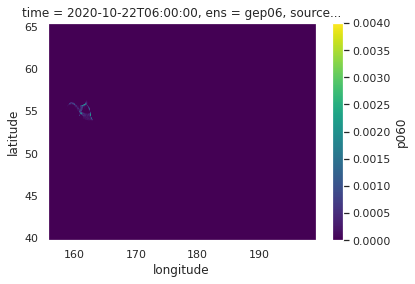

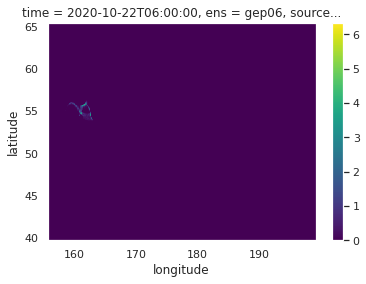

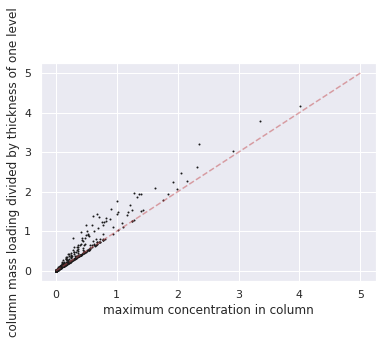

Text(0, 0.5, 'column mass loading g/m2')

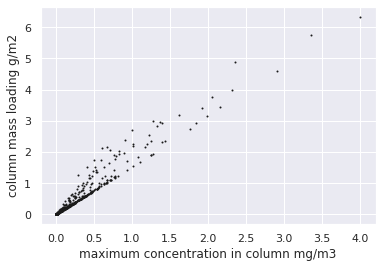

In [31]:
ens=5
tii=10
zvalues = cdump.z.values
zspace = zvalues[1]-zvalues[0]
print(zspace)
concmax.isel(ens=ens,source=0,time=tii).plot.pcolormesh(x='longitude',y='latitude')
plt.show()
massload.isel(ens=ens,source=0,time=tii).plot.pcolormesh(x='longitude',y='latitude')
plt.show()
# convert to mg
c1 = 1000* concmax.isel(ens=ens,source=0,time=tii)
m1 = 1000* massload.isel(ens=ens,source=0,time=tii)

plt.plot(c1.values.flatten(),m1.values.flatten()/zspace,'k.',MarkerSize=2)
plt.xlabel('maximum concentration in column')
plt.ylabel('column mass loading divided by thickness of one level')
plt.plot([0,5],[0,5],'--r',alpha=0.5)

plt.show()

plt.plot(c1.values.flatten(),m1.values.flatten()/1000,'k.',MarkerSize=2)
plt.xlabel('maximum concentration in column mg/m3')
plt.ylabel('column mass loading g/m2')





In [11]:
levels = np.array([0.2,2,5,10])
zspace = 1500
newlevs = levels * 1.5
newlevs


array([ 0.3,  3. ,  7.5, 15. ])

In [12]:
conc = cdump.p060

[ 1523  3047  4571  6095  7619  9143 10667 12191 13715]


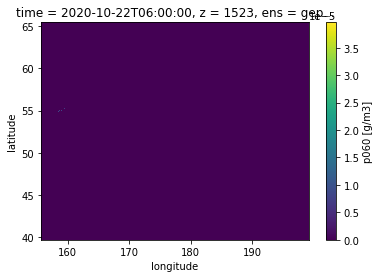

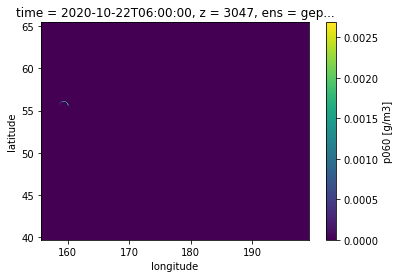

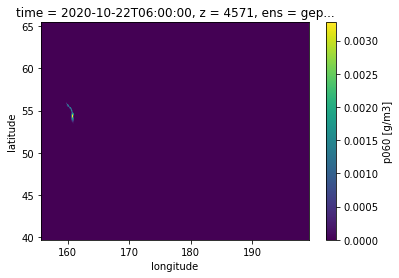

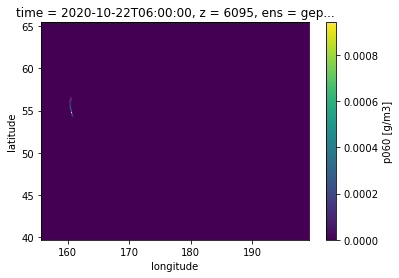

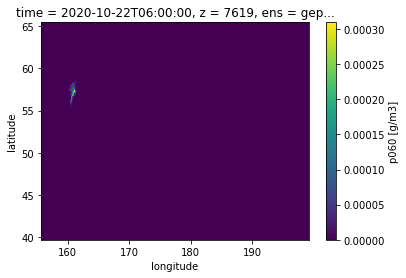

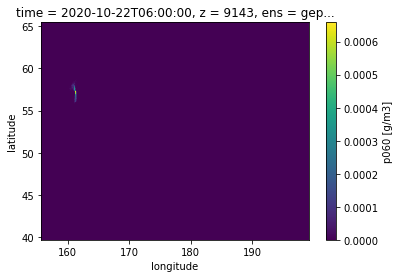

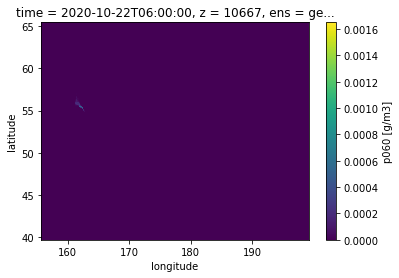

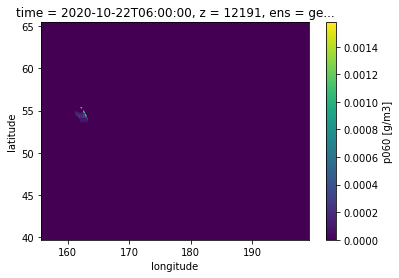

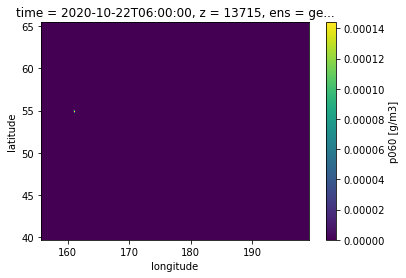

In [13]:
# slice the cloud vertically from bottom to top.
time_index = 10
zvalues = conc.z.values
print(zvalues)
for z in zvalues:
    temp = conc.isel(ens=1,time=time_index,source=0).sel(z=z)
    temp.plot.pcolormesh(x='longitude',y='latitude')
    plt.show()

In [14]:
# look at mean value
ensmean = conc.mean(dim='ens')

In [15]:
# this will replace 0 values with nans.
ensmean2 = xr.where(ensmean<=0,np.nan,ensmean)

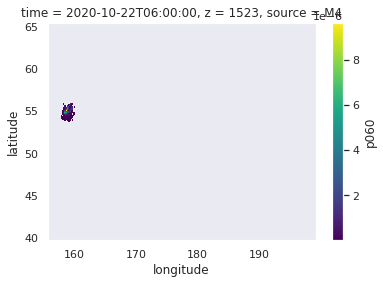

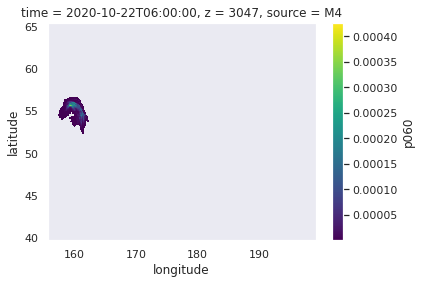

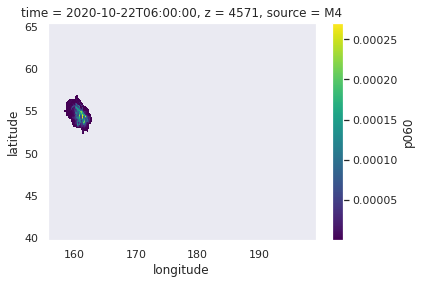

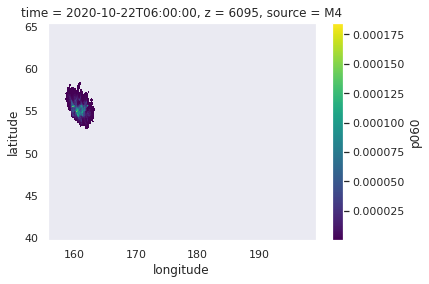

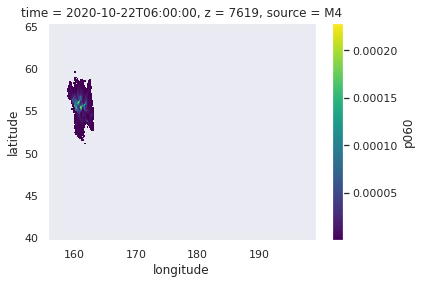

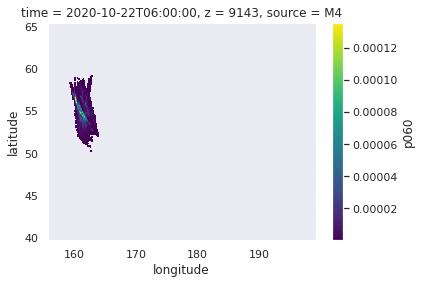

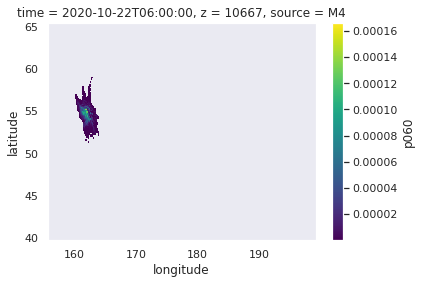

TypeError: invalid indexer array, does not have integer dtype: array(7.8)

In [32]:
for z in [0,1,2,3,4,5,6,7.8]:
    ensmean2.isel(time=10,z=z,source=0).plot.pcolormesh(x='longitude',y='latitude')
    plt.show()

In [17]:
from utilhysplit import concutils

54.0


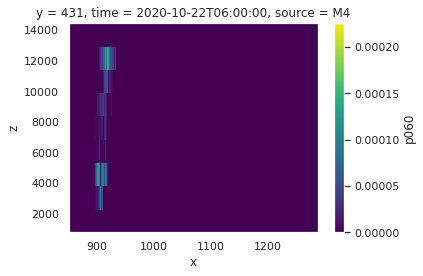

54.2


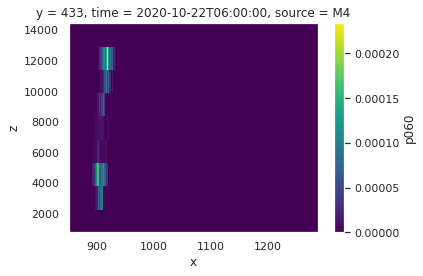

54.400000000000006


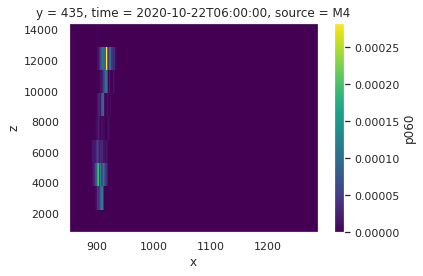

54.60000000000001


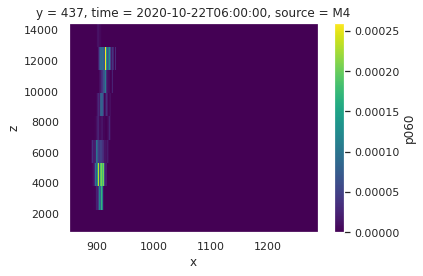

54.80000000000001


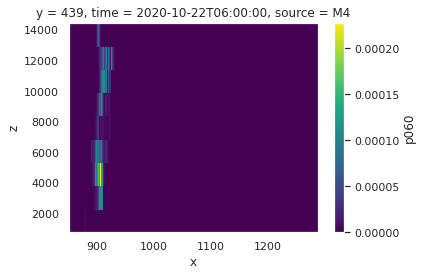

55.000000000000014


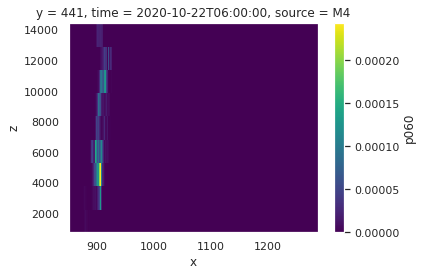

55.20000000000002


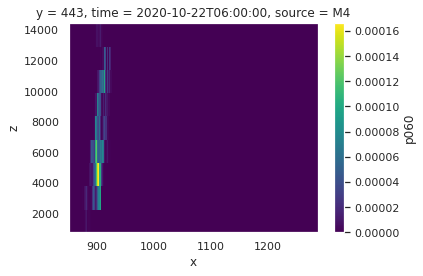

55.40000000000002


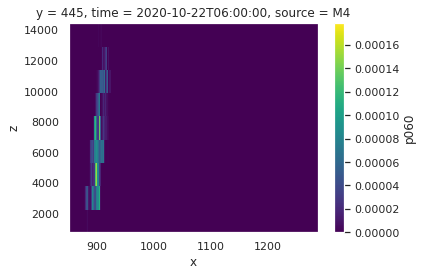

55.60000000000002


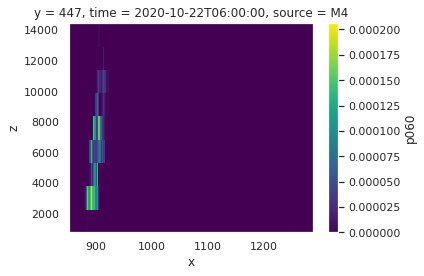

55.800000000000026


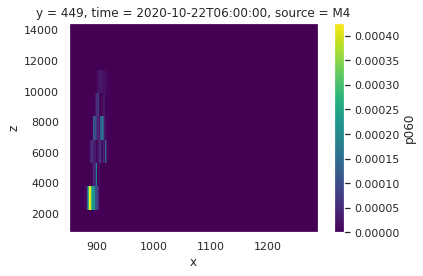

<xarray.DataArray 'longitude' (x: 436)>
array([ 155.68570709,  155.78570557,  155.88570404,  155.98570251,
        156.08570099,  156.18569946,  156.28569794,  156.38569641,
        156.48569489,  156.58569336,  156.68569183,  156.78569031,
        156.88568878,  156.98568726,  157.08568573,  157.1856842 ,
        157.28568268,  157.38568115,  157.48567963,  157.5856781 ,
        157.68567657,  157.78567505,  157.88567352,  157.985672  ,
        158.08567047,  158.18566895,  158.28566742,  158.38566589,
        158.48566437,  158.58566284,  158.68566132,  158.78565979,
        158.88565826,  158.98565674,  159.08565521,  159.18565369,
        159.28565216,  159.38565063,  159.48564911,  159.58564758,
        159.68564606,  159.78564453,  159.88564301,  159.98564148,
        160.08563995,  160.18563843,  160.2856369 ,  160.38563538,
        160.48563385,  160.58563232,  160.6856308 ,  160.78562927,
        160.88562775,  160.98562622,  161.08562469,  161.18562317,
        161.28562164, 

In [38]:
# slice along lines of latitude axis
latlist  = np.arange(54,56,0.2)
sns.set()
temp = ensmean.isel(time=10,source=0)
for lat in latlist:
    print(lat)
    latslice = concutils.yslice(temp,lat)
    latslice.plot.pcolormesh(x='x',y='z')
    plt.tight_layout()
    plt.show()
print(latslice.longitude)